https://www.dataschool.io/python-web-scraping-of-president-trumps-lies/#whatiswebscraping

* Problem Statement:
* 1) Extract reviews of any product from ecommerce website like amazon
* 2) Perform emotion mining

* created a csv file by copy pasting the reviews of 'alexa echo dot' product from the amazon website
* loaded the dataset of the reviews
* Did cleaning of the dataset
* Did emotion mining on the reviews of the product by using Afinn lexicon
* Based on the afinn score calculated the reviews
* It was observed that review were very positive for the 'alexa echo dot' product

In [46]:
!pip install afinn

  Created wheel for afinn: filename=afinn-0.1-py3-none-any.whl size=53449 sha256=fc830a320561cfc31ae03bcfffee93f15c43b65fd65da8fa368ef86303e10d64
  Stored in directory: c:\users\admin.desktop-isgpm4m\appdata\local\pip\cache\wheels\f6\6f\c3\b305c5107a17618f2938a067d5ffcbb556909d82398762089e
Successfully built afinn


In [129]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import string
import re
import spacy
import matplotlib.pyplot as plt

from nltk import tokenize
from afinn import Afinn

In [90]:
ds1 = pd.read_csv('alexa_echodot_reviews1.csv', nrows=25)
ds1

,Unnamed: 0,Reviews
0,1,...a bit weird talking to a speaker but you ge...
1,2,You get good depth of sound with decent bass.
2,3,3. Several skills available and you will defin...
3,4,...After considering few factors I decided to ...
4,5,Pros: 1)�Sound�quality�and volume has improved...
5,6,2) Alexa and Amazon services are more integrat...
6,7,1)�Sound�quality�and volume has improved a lot...
7,8,2) Alexa and Amazon services are more integrat...
8,9,"3) It can used as a smart speaker,Bluetooth sp..."
9,10,4) Amazon prime membership at Rs 999 per year ...


In [92]:
ds1.drop(labels='Unnamed: 0', axis=1, inplace=True)

In [93]:
ds = ds1.copy()
print(ds.shape)
ds.head(5)

(25, 1)


,Reviews
0,...a bit weird talking to a speaker but you ge...
1,You get good depth of sound with decent bass.
2,3. Several skills available and you will defin...
3,...After considering few factors I decided to ...
4,Pros: 1)�Sound�quality�and volume has improved...


## Data Cleaning

In [94]:
def remove_digits(input_str):
    return re.sub(r'\d+','',input_str)

#removes ?,.-_! so on 14 chars in total
def remove_punctuation(input_str):
    punct = string.punctuation
    trantab = str.maketrans(punct, len(punct)*' ')
    return input_str.translate(trantab)


ds.Reviews = ds.Reviews.apply(remove_digits)
ds.Reviews = ds.Reviews.apply(remove_punctuation)
ds

,Reviews
0,a bit weird talking to a speaker but you ge...
1,You get good depth of sound with decent bass
2,Several skills available and you will defini...
3,After considering few factors I decided to ...
4,Pros �Sound�quality�and volume has improved ...
5,Alexa and Amazon services are more integrate...
6,�Sound�quality�and volume has improved a lot ...
7,Alexa and Amazon services are more integrate...
8,It can used as a smart speaker Bluetooth spe...
9,Amazon prime membership at Rs per year is t...


In [95]:
ds = [x.strip() for x in ds.Reviews]
ds = [x.lower() for x in ds]
ds

['a bit weird talking to a speaker but you get used to it in no time    the sound quality is pretty good',
 'you get good depth of sound with decent bass',
 'several skills available and you will definitely find some very useful',
 'after considering few factors i decided to buy this echo dot rd gen',
 'pros   �sound�quality�and volume has improved a lot from previous gen',
 'alexa and amazon services are more integrated with indian market which the google lacks',
 '�sound�quality�and volume has improved a lot from previous gen',
 'alexa and amazon services are more integrated with indian market which the google lacks  for example i can book uber cab order food in zomato order things from amazon without even taking out my smartphone',
 'it can used as a smart speaker bluetooth speaker and also it has   mm headphone jack',
 'amazon prime membership at rs  per year is the most value for money subscription  you can stream in amazon prime video  music from prime music  become an amazon pri

## Emotion Mining

In [134]:
afn = Afinn()
#afinn.score('This is excellent')
#afn.score('the weather is very dull today')

#calculates afin scores of the text
scores       = [afn.score(x) for x in ds]


assert_words_list = [afn.find_all(x) for x in ds]
assert_words = []
for item in assert_words_list:
    assert_words.append(item)

#print(assert_words)

#total words present in the sentence
wordcount = []
for sentence1 in ds:
    wordcount.append(len(afn.split(sentence1)))

#print(wordcount)

#based on afinn scores review is calculated
review = []
for item in scores:
    if item >0:
        review.append('Positive')
    elif item <0:
        review.append('Negative')
    else:    
        review.append('Neutral')
        

#creating a table of sentences, scores, sentiment 
emotion_mining_table                 = pd.DataFrame()
emotion_mining_table['sentences']    = ds
emotion_mining_table['score']        = scores
emotion_mining_table['review']       = review
emotion_mining_table['wordcount']    = wordcount # total word count of sentence
emotion_mining_table['assert_words'] = assert_words #words considered for scoring
emotion_mining_table['index']        = range(0,len(ds))
emotion_mining_table

,sentences,score,review,wordcount,assert_words,index
0,a bit weird talking to a speaker but you get u...,3.0,Positive,22,"[weird, no, quality, pretty, good]",0
1,you get good depth of sound with decent bass,3.0,Positive,9,[good],1
2,several skills available and you will definite...,2.0,Positive,11,[useful],2
3,after considering few factors i decided to buy...,0.0,Neutral,13,[],3
4,pros �sound�quality�and volume has improved ...,4.0,Positive,12,"[quality, improved]",4
5,alexa and amazon services are more integrated ...,0.0,Neutral,14,[],5
6,�sound�quality�and volume has improved a lot f...,4.0,Positive,11,"[quality, improved]",6
7,alexa and amazon services are more integrated ...,0.0,Neutral,35,[],7
8,it can used as a smart speaker bluetooth speak...,1.0,Positive,16,[smart],8
9,amazon prime membership at rs per year is the...,1.0,Positive,44,[free],9


Text(0.5, 1.0, 'Sentiment value Plot')

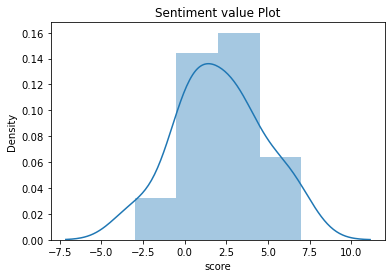

In [131]:
sns.distplot(emotion_mining_table['score'])
plt.title('Sentiment value Plot')

<AxesSubplot:xlabel='index', ylabel='score'>

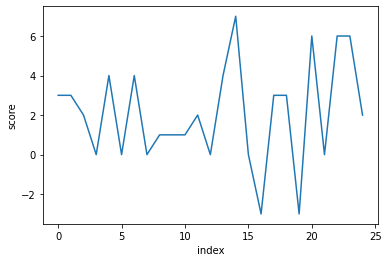

In [135]:
sns.lineplot(y ='score', x='index', data=emotion_mining_table)

Text(0, 0.5, 'Sentiment score')

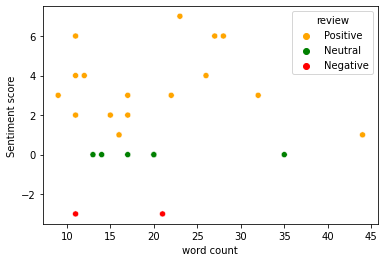

In [141]:
sns.scatterplot(x='wordcount',y='score', data=emotion_mining_table, hue='review', 
                palette=['orange','green','red'])
plt.xlabel('word count')
plt.ylabel('Sentiment score')